In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [74]:
df = pd.read_csv("Data/bank-additional-full.csv", delimiter=";")

In [75]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [78]:
df.duplicated().sum()

10

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.shape

(30478, 21)

In [81]:
X = df.drop(columns=["y"])
y = df["y"]

In [82]:
y = y.apply(lambda x: 0 if x == "no" else 1)

In [83]:
X_features = X.columns

In [84]:
num_features = X.select_dtypes(include=[int, float]).columns
cat_features = X.select_dtypes(include=object).columns

In [85]:
X = pd.get_dummies(X, columns=cat_features)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=9)

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [88]:
logistic_regressor = LogisticRegression(penalty="l2", max_iter=1000)

In [89]:
logistic_regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [90]:
y_pred = logistic_regressor.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.8966535433070866

## Decision Trees

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=9, shuffle=True)

In [94]:
tree_model = DecisionTreeClassifier(random_state=9, max_depth=5)

In [95]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=9)

In [96]:
y_pred_tree = tree_model.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred_tree)

0.9037620297462817

In [98]:
feature_importance = tree_model.feature_importances_
features = X.columns

best_ = {feature: importance for feature, importance in zip(features, feature_importance)}

In [99]:
sorted_dict = dict(sorted(best_.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_features = [item for item in sorted_dict]
top_10_values = [value for item, value in sorted_dict.items()]

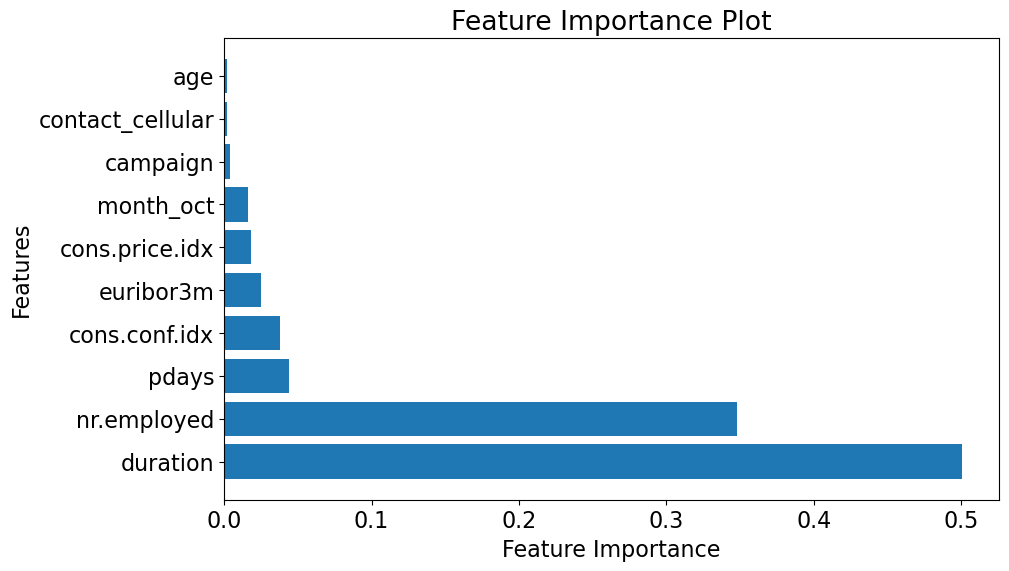

In [100]:
feature_importance = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

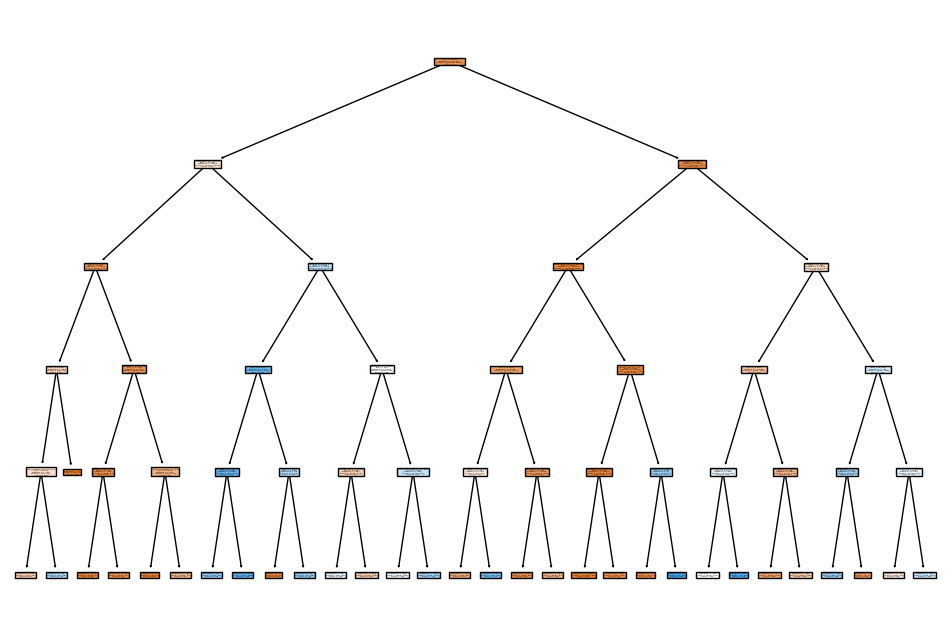

In [101]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=["No", "Yes"])
plt.show()

## SGD

In [102]:
from sklearn.linear_model import SGDClassifier

In [103]:
sgd_model = SGDClassifier(random_state=9)

In [104]:
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=9)

In [105]:
y_pred_sgd = sgd_model.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_sgd)

0.8912948381452318

In [107]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],          # Regularization strength
    'penalty': ['l1', 'l2'],                    # Regularization type
    'max_iter': [1000, 2000, 3000],                # Maximum number of iterations
    'loss': ['hinge', 'log', 'modified_huber'], # Loss function
}

In [108]:
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, scoring='accuracy', cv=5)

In [109]:
grid_search.fit(X_train, y_train)

/Users/sabiranthapa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sabiranthapa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sabiranthapa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sabiranthapa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=9),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [110]:
# best_params

In [111]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_features='sqrt', random_state=42)
RF_clf.fit(X_train, y_train)
RFC_pred = RF_clf.predict(X_test)

In [113]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [20, 20]

/var/folders/vf/3r21zwg52v598lmj9byrktx00000gn/T/ipykernel_18242/1892926866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

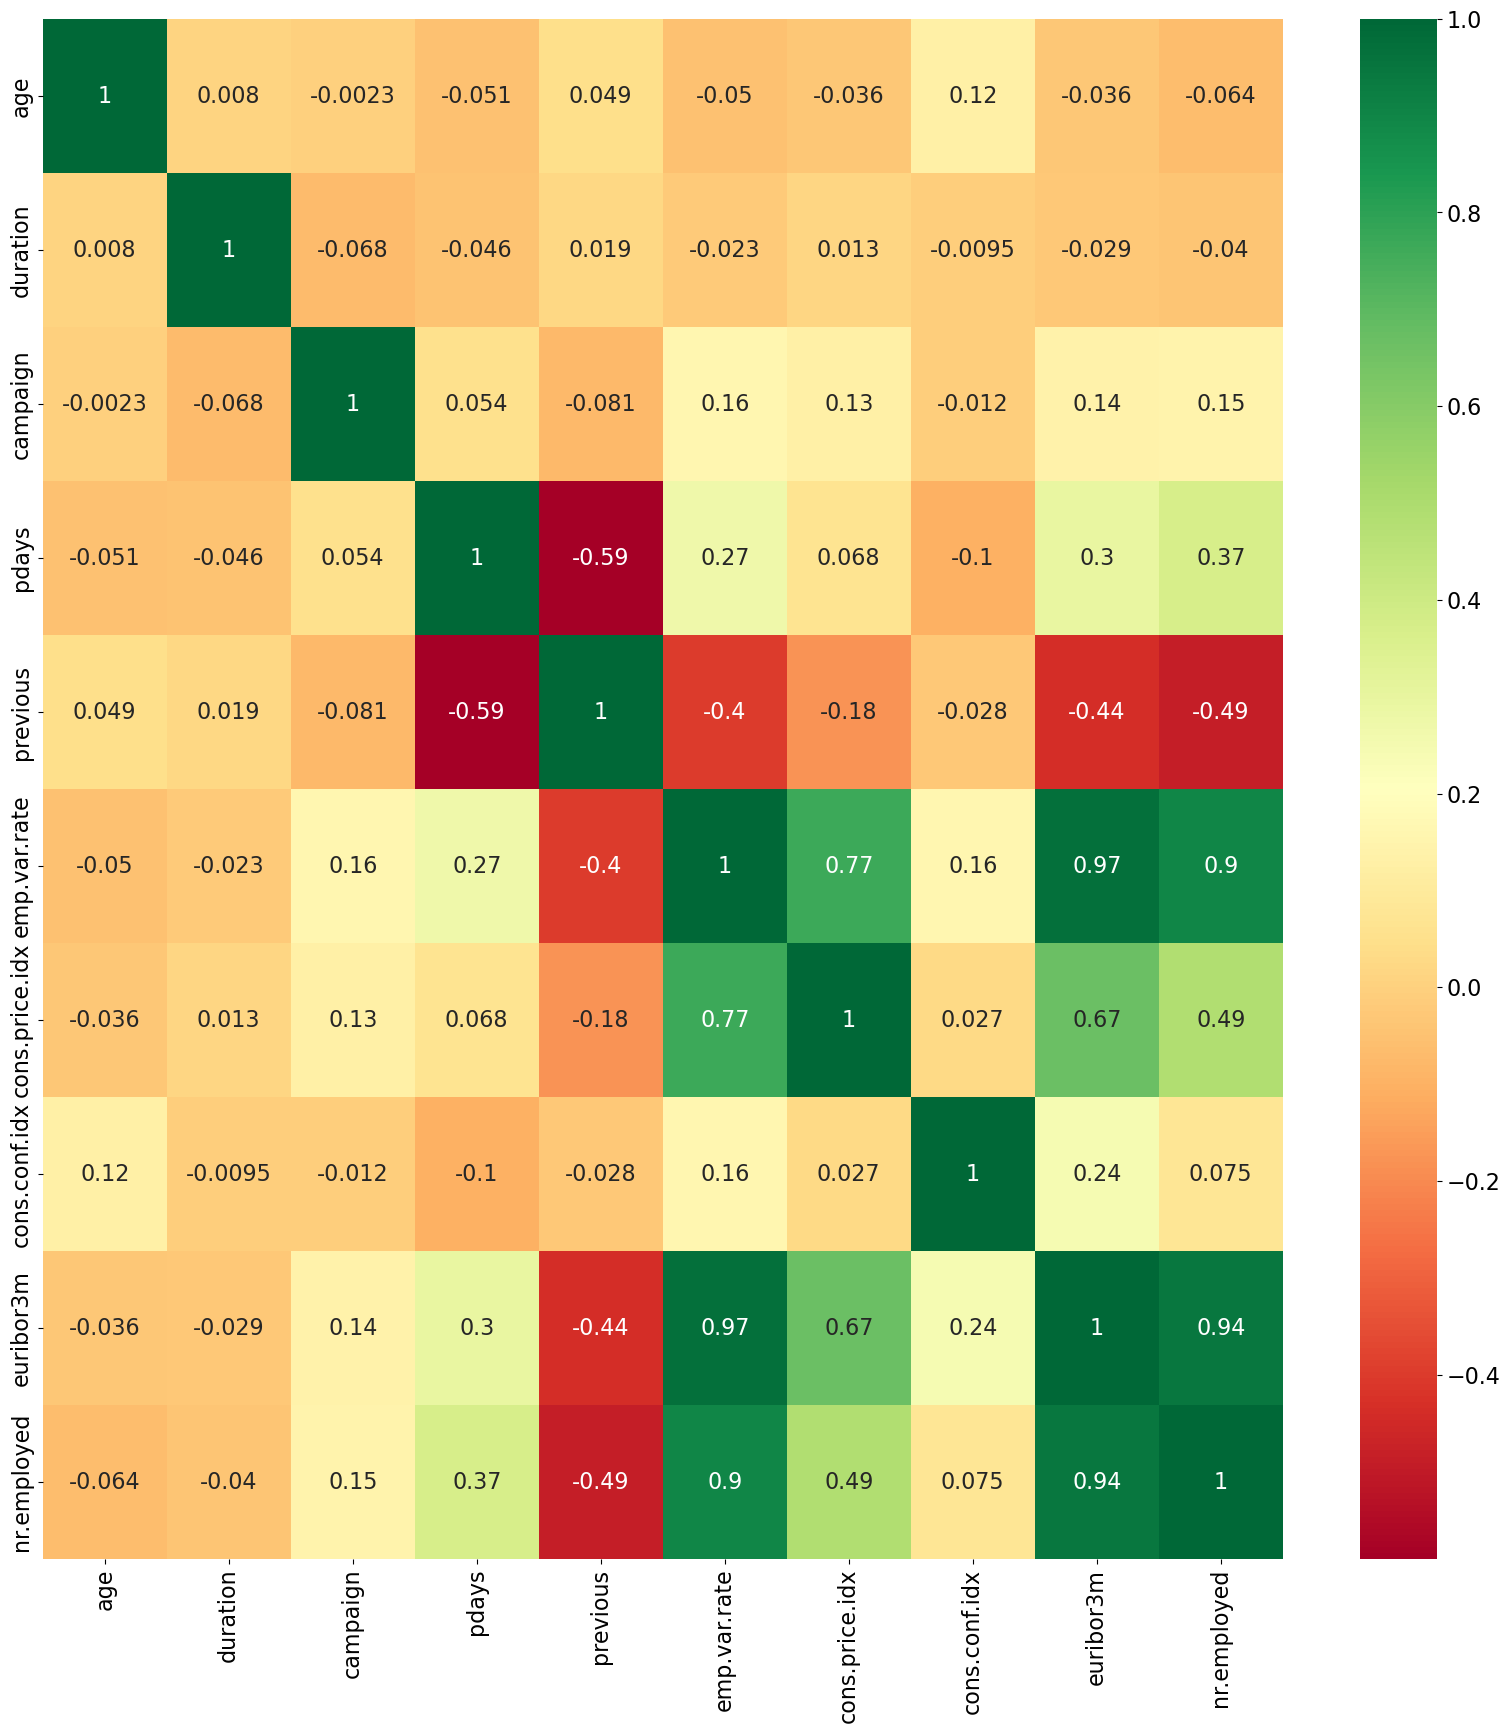

In [114]:
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [118]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RF_clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [119]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [120]:
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [138]:
accuracy = accuracy_score(y_test, RFC_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

RF_clf_grid_search_pred = best_rf_model.predict(X_test)
accuracy_grid_search = accuracy_score(y_test, RF_clf_grid_search_pred)
print(f"Accuracy Grid Search: {accuracy_grid_search*100:.2f}%")

Accuracy: 90.05%
Accuracy Grid Search: 90.21%


In [140]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

train_rf_predictions = RF_clf.predict(X_train)
train_rf_probs = RF_clf.predict_proba(X_train)[:, 1]

rf_predictions = RF_clf.predict(X_test)
rf_probs = RF_clf.predict_proba(X_test)[:, 1]

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, rf_probs)}')

train_rf_grid_search_predictions = best_rf_model.predict(X_train)
train_rf_grid_search_probs = best_rf_model.predict_proba(X_train)[:, 1]

rf_grid_search_predictions = best_rf_model.predict(X_test)
rf_grid_search_probs = best_rf_model.predict_proba(X_test)[:, 1]

print(f'Train ROC AUC Score with Grid Search: {roc_auc_score(y_train, train_rf_grid_search_probs)}')
print(f'Test ROC AUC  Score with Grid Search: {roc_auc_score(y_test, rf_grid_search_probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9366662318652441
Train ROC AUC Score with Grid Search: 0.9876697040117417
Test ROC AUC  Score with Grid Search: 0.9389840459083729


In [125]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [128]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Recall Baseline: 1.0 Test: 0.46 Train: 1.0
Precision Baseline: 0.13 Test: 0.69 Train: 1.0
Roc Baseline: 0.5 Test: 0.94 Train: 1.0


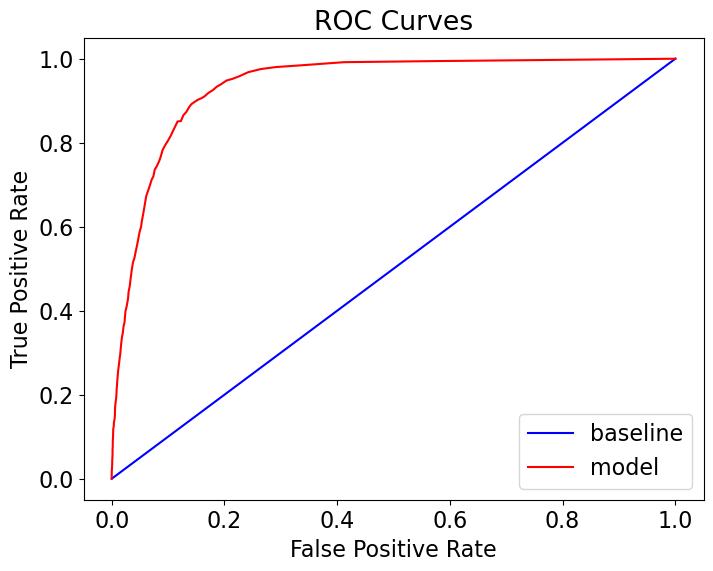

In [129]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Recall Baseline: 1.0 Test: 0.44 Train: 0.71
Precision Baseline: 0.13 Test: 0.71 Train: 0.92
Roc Baseline: 0.5 Test: 0.94 Train: 0.99


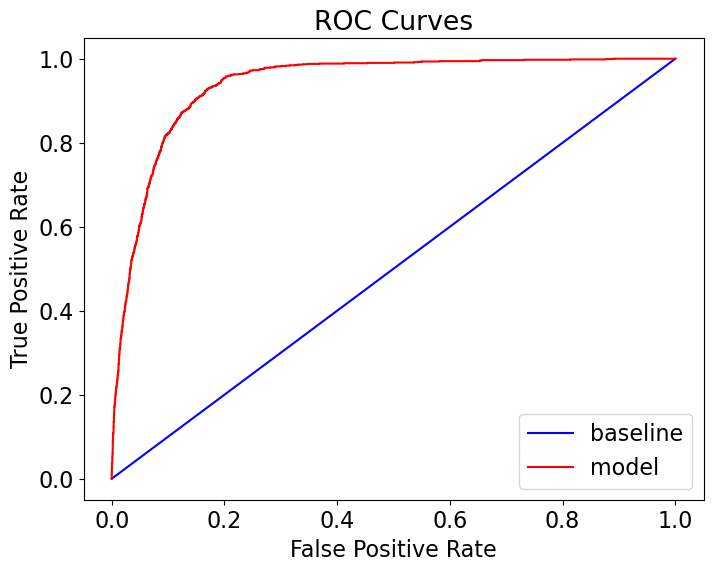

In [130]:
evaluate_model(rf_grid_search_predictions, rf_grid_search_probs, train_rf_grid_search_predictions, train_rf_grid_search_probs)

Confusion matrix, without normalization


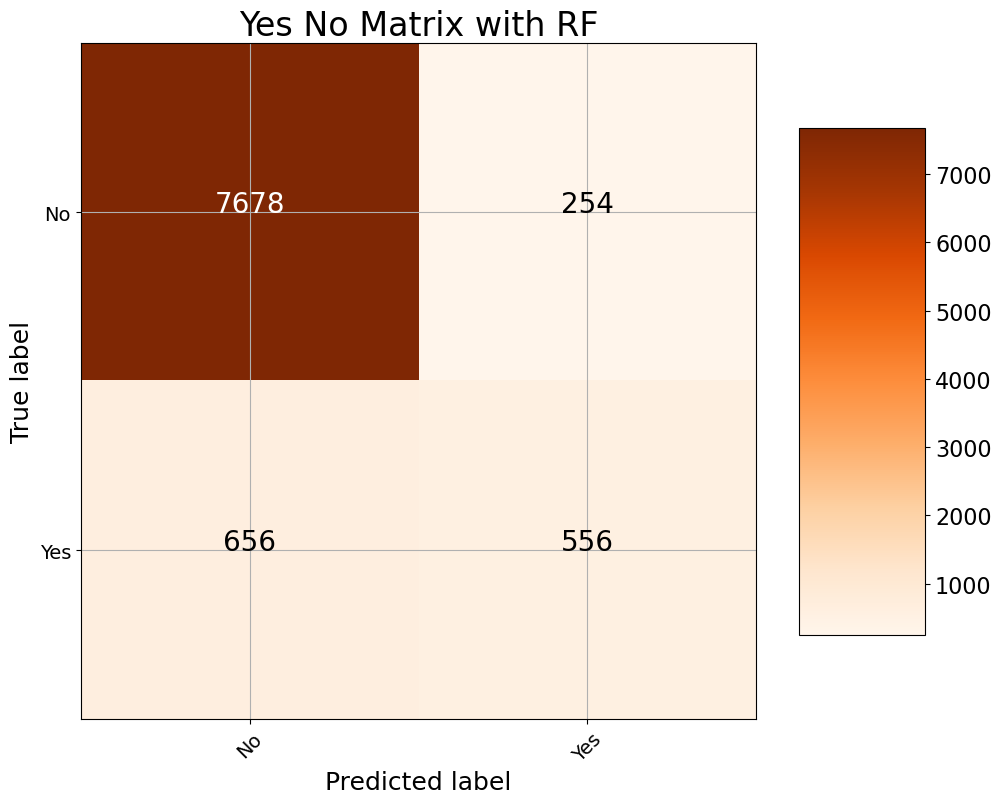

In [136]:
cm = confusion_matrix(y_test, RFC_pred)
plot_confusion_matrix(cm, classes = ['No', 'Yes'],
                      title = 'Yes No Matrix with RF')

Confusion matrix, without normalization


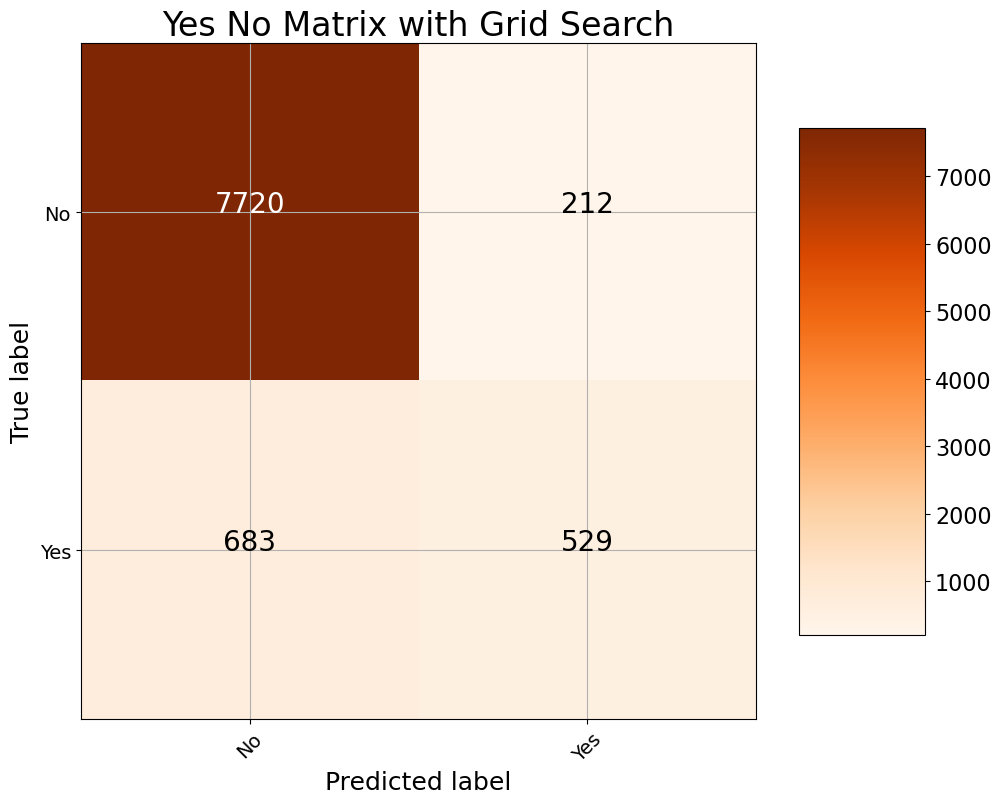

In [135]:
cm = confusion_matrix(y_test, RF_clf_grid_search_pred)
plot_confusion_matrix(cm, classes = ['No', 'Yes'],
                      title = 'Yes No Matrix with Grid Search')